In [81]:
!pip install hub
import hub
#import hub
ds = hub.load("hub://activeloop/300w")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
hub://activeloop/300w loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/300w


In [82]:
import numpy as np
import matplotlib.pyplot as plt

# plt.figure()
# plt.imshow(ds.images[2].numpy())
# for i in range(len(ds.keypoints[2].numpy(aslist=True))//3):
#   x = ds.keypoints[2].numpy(aslist=True)[3*i]
#   y = ds.keypoints[2].numpy(aslist=True)[3*i+1]
#   plt.plot(x,y,marker='o',color='red')

# print(ds.keypoints[2].numpy(aslist=True))


In [83]:
#list=[5,8,9,4,3]
#a=np.array([1,2,3])
#print(list[a])
print(np.shape(ds.images[5]))

(350, 470, 3)


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Voir l'état du dataset
print(ds.tensors.keys())
# Dimensions des images
print(np.shape(ds.images[0].numpy()))
print(len(ds.images))
print(type(ds.images))
# print(ds.images[0], ds.images[1])
# print(ds.keypoints)
#print([ds.images[0].numpy(aslist=True),ds.images[1].numpy(aslist=True)])

# x=ds.keypoints[400].numpy(aslist=True)[0]
# y=ds.keypoints[400].numpy(aslist=True)[1]
# print()
# print(ds.keypoints[0].numpy(aslist=True))
# train_limite = int(0.8*len(ds.images))
# val_limite = int(0.1*len(ds.images))
# test_limite = int(0.1*len(ds.images))
# print(train_limite)
# print(val_limite)
# print(test_limite)
# print(train_limite+val_limite+test_limite)
# print(ds.images[:200])
# plt.figure()
# plt.imshow(ds.images[400].numpy())
# for i in range(68):
#   x=ds.keypoints[400].numpy(aslist=True)[3*i]
#   y=ds.keypoints[400].numpy(aslist=True)[3*i+1]
#   plt.plot(x,y,marker='o',color='red')


dict_keys(['images', 'keypoints', 'labels'])
(1536, 2048, 3)
599
<class 'hub.core.tensor.Tensor'>


## **Paramètres**






In [85]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import load_img, smart_resize



In [96]:
# Paramètres du générateur
TRAINING_BATCH_SIZE = 1
VALIDATION_BATCH_SIZE = 1
TESTING_BATCH_SIZE = 1
SHUFFLE_DATA = True
TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
TEST_SIZE = 0.1
IMAGE_SIZE=(200,200)
NUMBER_OF_CHANNELS=3

## **Générateur**

In [87]:
print(ds.images[226].numpy(aslist=True))
  

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [185]:
def create_generators():

    train_limite = int(TRAIN_SIZE*len(ds.images))
    val_limite = int(VALIDATION_SIZE*len(ds.images))
    test_limite = int(TEST_SIZE*len(ds.images))
    if train_limite + val_limite + test_limite != 0:
      train_limite += len(ds.images) - (train_limite + val_limite + test_limite)
    train_list = list(range(train_limite))
    val_list = list(range(train_limite, train_limite + val_limite))
    test_list = list(range(train_limite + val_limite, len(ds.images)))

    train_data_generator = DataGeneratorClassifier(train_list, TRAINING_BATCH_SIZE)
    validation_data_generator = DataGeneratorClassifier(val_list, VALIDATION_BATCH_SIZE)
    test_data_generator = DataGeneratorClassifier(test_list, TESTING_BATCH_SIZE)
    return train_data_generator, validation_data_generator, test_data_generator

class DataGeneratorClassifier(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size, shuffle=SHUFFLE_DATA):
        'Initialisation'
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()
        self.image_size=IMAGE_SIZE
        self.n_channels=NUMBER_OF_CHANNELS
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        #print(indexes)
        #print(type(indexes))
        #print(self.list_IDs)
        #print(type(self.list_IDs))
        list_IDs_temp = np.array(self.list_IDs)[indexes]
        X, y = self.__data_generation(list_IDs_temp)
        
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
      #X = np.empty((self.batch_size, *self.image_size, self.n_channels))
      #y = np.empty((self.batch_size,68*2))
      

      for i, ID in enumerate(list_IDs_temp):
        #print(type(int(ID)))
        #print(type(6))
        Xi = np.array(ds.images[int(ID)])
        #Xi = smart_resize(np.asarray(Xi), self.image_size)  #On ENLEVE LE SMART RESIZE
      
        #print(Xi)
        label=[]
        for j in range(len(ds.keypoints[int(ID)].numpy())//3):
          x_keypoint = np.array(ds.keypoints[int(ID)].numpy())[3*j]
          y_keypoint = np.array(ds.keypoints[int(ID)].numpy())[3*j+1]
          #print(x_keypoint)
          label+=[x_keypoint]
          label+=[y_keypoint]
        #print(y[i])
        #y[i]=ds.keypoints[int(ID)].numpy().reshape(1,-1)
        y[i]=np.array(label).reshape(1,-1)
        #print(np.shape(y[i]))
        X[i,:] = Xi
      return X,y

def show_batch(generator, batch_number=0):
  images, labels = generator.__getitem__(batch_number)
  width = int(np.floor(np.sqrt(labels.shape[0])))
  height = int(np.ceil(labels.shape[0]/float(width)))
  total_height = int(0.09*height*images.shape[1])
  total_width = int(0.09*width*images.shape[2])
  f, axarr = plt.subplots(height,width, figsize=(total_height,total_width))
  for image in range(images.shape[0]):
      image_to_show = (images[image])/np.max(images[image])
      axarr[image//width,image%width].imshow(image_to_show)
      axarr[image//width,image%width].set_title(generator.classes[np.argmax(labels[image])])
  f.tight_layout()
  plt.show()

def show_image(generator, batch_number=0):
  images, labels = generator.__getitem__(batch_number)
  return(images,labels)
# print(create_generators()[0])
# print(create_generators()[1])
#create_generators()
#show_batch(create_generators()[0])

In [89]:
len(ds.keypoints[int(3)].numpy())

204

In [90]:
print(np.shape(ds.keypoints[int(1)].numpy()))

(204, 1)


(64, 200, 200, 3)
(136,)


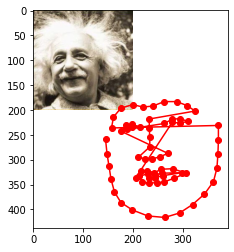

In [91]:
#afficher image 0
gene=create_generators()[0]
p=show_image(gene,0)
print(np.shape(p[0]))
im=p[0][0]
lab=p[1][0]
print(np.shape(lab))


plt.figure()
plt.imshow(im/255)

x_list=[]
y_list=[]
for k in range(len(lab)):
  if ((k%2)==0):
    x_list.append(lab[k])
  else:
    y_list.append(lab[k])

plt.plot(x_list,y_list,marker='o',color='red')
plt.show()


  


In [92]:
KERNEL_SIZE=(3,3)
DROPOUT_RATE=0.3
NOMBRE_EPOCHS=50

In [117]:
from tensorflow.keras.layers import Input, Conv2D,Conv3D, MaxPooling2D, Activation, ReLU
from tensorflow.keras.models import Model, Sequential

In [189]:
input_size=(200,200,3)
tf.random.set_seed(33)
input = Input(input_size)
l1=Conv2D(32, KERNEL_SIZE, activation='relu', padding='same', strides=1)(input)
l2=Conv2D(32, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l1)
l3=MaxPool2D(pool_size=2)(l2)
l4=Conv2D(64, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l3)
l5=Conv2D(64, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l4)
l6=MaxPool2D(pool_size=2)(l5)
l7=Conv2D(128, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l6)
l8=Conv2D(128, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l7)
l9=MaxPool2D(pool_size=2)(l8)
l10=Conv2D(256, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l9)
l11=Conv2D(256, KERNEL_SIZE, activation='relu', padding='same', strides=1)(l10)
l12=MaxPool2D(pool_size=2)(l11)
l13=Flatten()(l12)
l14=Dense(136, activation='tanh')(l13)
#model.add(Dropout(rate=DROPOUT_RATE))
#model.add(Dense(11, activation='softmax'))
model = Model(inputs=input,outputs=l14) #, output = conv10)

  
#model.build(input_shape=(TRAINING_BATCH_SIZE, *TRAINING_IMAGE_SIZE, NUMBER_OF_CHANNELS))
model.compile(optimizer='adam',loss='mse')
#model.summary() 
#return(model)

## Sauvegarde du model
#from keras.models import load_model

#model.save('/content/drive/MyDrive/Projet_tri_dechets')  # creates a HDF5 file 'my_model.h5'


#model = load_model('model.h5')

In [ ]:
los_mse

In [190]:

#gradient tape
def train_step(images, labels):
        with tf.GradientTape() as tape:
            print(np.shape(images))
            predictions = model(np.array([images]),training=True)
            print(predictions)
            pred_loss = tf.losses.MSE(labels, predictions)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
        grads = tape.gradient(pred_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        #loss_metric=tf.losses.MSE()
        #loss_metric.update_state(pred_loss)
        #accuracy_metric.update_state(labels, predictions)

        #for epoch in range(10):
            #loss_metric.reset_states()
            #accuracy_metric.reset_states()

            #for images, labels in train_dataset:
                #train_step(images, labels)

            #train_loss_history.append(loss_metric.result())
            #accuracy_history.append(accuracy_metric.result())
            #print(f'Epoch {epoch}, Loss {loss_metric.result()}, Accuracy {accuracy_metric.result()}')

        #print("accuracy: ", accuracy_history)
        #print("train loss: ", train_loss_history)

In [194]:
gene=create_generators()[0]
p=show_image(gene,100)
input_size=np.shape(p)
print(input_size)

ValueError: ignored

In [192]:
train_step(p[0][0],p[1][0])

(200, 200, 3)
tf.Tensor(
[[ 0.9907212  -0.22508965  0.69121873  0.27203205 -0.31013736  0.8789746
   0.9542114  -0.13161781  0.64103466  0.26282656 -0.4148027   0.10690589
   0.17877     0.5812426   0.74788356  0.30222362 -0.11613716  0.83054495
  -0.42575273 -0.6504994  -0.94726914 -0.8392829  -0.33048815  0.6426162
   0.11534689  0.79629105  0.04712704  0.6896931  -0.528709   -0.785962
   0.6063278  -0.68639594 -0.8356311  -0.13470928  0.5654597  -0.8639497
   0.92362666 -0.28218123  0.7560821   0.17549758 -0.5587732  -0.9016142
  -0.07235447  0.81534994  0.7627044  -0.98945224 -0.37563908  0.07483237
  -0.71480364  0.84480727  0.94244707 -0.86035544  0.9033458   0.98839647
   0.42087692 -0.39593297  0.05272475  0.60261416  0.8826493  -0.11640972
  -0.628099   -0.39095867 -0.46367913  0.90458715 -0.771299    0.55730325
  -0.94418955  0.27660084 -0.9531879  -0.2920445   0.78298354 -0.6030106
  -0.97069746  0.22807679 -0.54709655  0.8762765  -0.67693233 -0.27358586
   0.72917813 -0.734

In [188]:
model=init()
def train():
  #cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
  #cp_callback =tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True)
  k=create_generators()
  training_generator=k[0]
  validation_generator=k[1]
  global test_generator
  test_generator=k[2]
  #show_batch(validation_generator, batch_number=1)
  history=model.fit(training_generator,validation_data=validation_generator,epochs=NOMBRE_EPOCHS,batch_size=TRAINING_BATCH_SIZE) #callbacks=[cp_callback])
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

ValueError: ignored

In [ ]:
train()